# Setup

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import model_selection

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn import tree
from sklearn.metrics import accuracy_score

from vecstack import stacking 

## Loading data

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df_base = pd.read_csv(r'dataframes/baseline_dataframe.csv')
df_base.head()

,state,converted_pledged_amount,goal_usd,backers_count,len_of_name,len_of_description,creation_time_to_launch,planned_time,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,staff_pick
0,1,1950,1000.0,47,23,125,194.546111,720.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,22404,15000.0,271,51,108,5398.295000,720.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2820,2800.0,3,40,121,98.460000,720.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,3725,3500.0,35,31,134,3824.832222,720.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3890,2500.0,71,51,123,261.915000,722.075278,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### exclude features, we have no influence on before starting, especially staff_pick is completely subjective from kickstarter

In [5]:
df_new = df_base.drop(columns = ['converted_pledged_amount', 'backers_count', "staff_pick"])

In [6]:
df_new.head()

,state,goal_usd,len_of_name,len_of_description,creation_time_to_launch,planned_time,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,1,1000.0,23,125,194.546111,720.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,15000.0,51,108,5398.295000,720.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2800.0,40,121,98.460000,720.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,3500.0,31,134,3824.832222,720.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2500.0,51,123,261.915000,722.075278,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Prepare dataset for modelling

In [7]:
### Devide dataset in X and y:
#X = df_base[['backers_count', 'len_of_name']]
X = df_new.iloc[:, 1:]
y = df_new.iloc[:, 0]

In [8]:
### Scaling:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scalerNB = MinMaxScaler()
X_scaled_NB = scalerNB.fit_transform(X)

In [9]:
### Train test split:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)

In [10]:
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=41)

In [11]:
X_train_scaled_NB ,X_test_scaled_NB ,y_train,y_test = train_test_split(X_scaled_NB,y,test_size=0.25,random_state=41)

## Logistic Regression

In [12]:
# without scaling

In [13]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [14]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6467822509550397


In [15]:
confusion_matrix(y_test, y_pred)

array([[ 4316,  8568],
       [ 2250, 15493]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.33      0.44     12884
           1       0.64      0.87      0.74     17743

    accuracy                           0.65     30627
   macro avg       0.65      0.60      0.59     30627
weighted avg       0.65      0.65      0.62     30627



In [17]:
# with scaling
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_scaled,y_train)
y_pred=logistic_regression.predict(X_test_scaled)

In [18]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6813269337512652


In [19]:
confusion_matrix(y_test, y_pred)

array([[ 6193,  6691],
       [ 3069, 14674]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56     12884
           1       0.69      0.83      0.75     17743

    accuracy                           0.68     30627
   macro avg       0.68      0.65      0.65     30627
weighted avg       0.68      0.68      0.67     30627



## Decision Tree

In [21]:
# without scaling
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state = 41)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

In [22]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6715969569334248


In [23]:
confusion_matrix(y_test, y_pred)

array([[ 4460,  8424],
       [ 1634, 16109]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.35      0.47     12884
           1       0.66      0.91      0.76     17743

    accuracy                           0.67     30627
   macro avg       0.69      0.63      0.62     30627
weighted avg       0.69      0.67      0.64     30627



In [25]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(decision_tree, out_file ='tree.dot', 
               feature_names =list(X.columns)) 

In [26]:
!dot -Tpng tree.dot -o Tree.png #run in bash

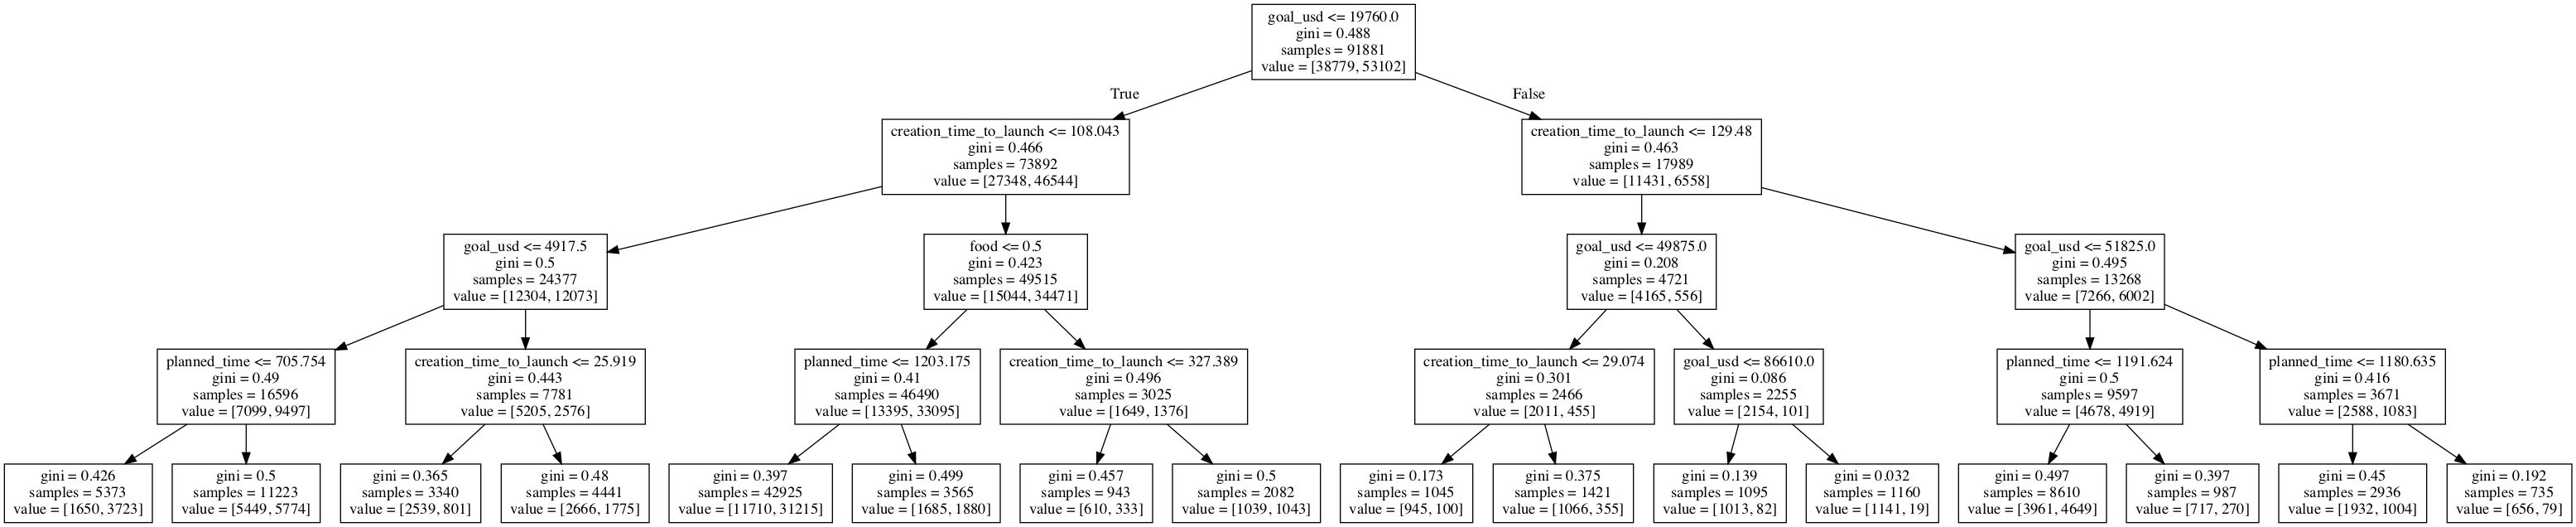

In [27]:
from IPython.display import Image
Image("Tree.png")

In [28]:
# with scaling
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state = 41)
decision_tree.fit(X_train_scaled,y_train)
y_pred = decision_tree.predict(X_test_scaled)

In [29]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6715969569334248


In [30]:
confusion_matrix(y_test, y_pred)

array([[ 4460,  8424],
       [ 1634, 16109]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.35      0.47     12884
           1       0.66      0.91      0.76     17743

    accuracy                           0.67     30627
   macro avg       0.69      0.63      0.62     30627
weighted avg       0.69      0.67      0.64     30627



In [32]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(decision_tree, out_file ='tree.dot', 
               feature_names =list(X.columns)) 

In [33]:
!dot -Tpng tree.dot -o Tree.png #run in bash

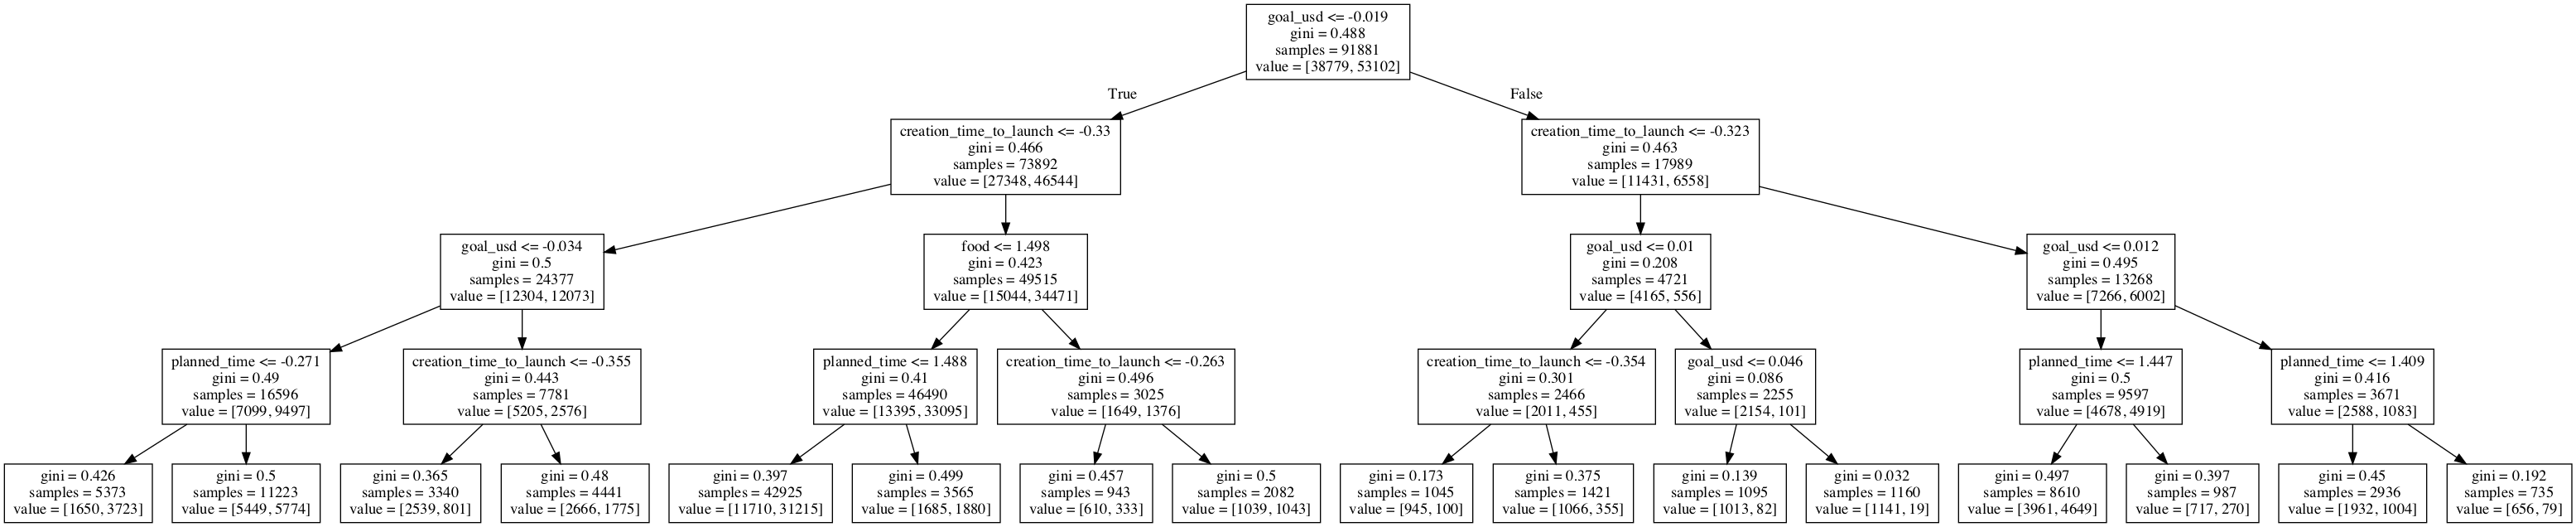

In [34]:
from IPython.display import Image
Image("Tree.png")

## KNN

In [35]:
###1. without scaling

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)

In [37]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6436477617788227


In [38]:
confusion_matrix(y_test, y_pred)

array([[ 6679,  6205],
       [ 4709, 13034]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55     12884
           1       0.68      0.73      0.70     17743

    accuracy                           0.64     30627
   macro avg       0.63      0.63      0.63     30627
weighted avg       0.64      0.64      0.64     30627



In [40]:
###2. with scaling
############################## DONT' TOUCH SINCE VERY COMPUTATIONAL EXPENSIVE

In [41]:
#knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', n_jobs=-1)
#knn.fit(X_train_scaled, np.ravel(y_train))
#y_pred = knn.predict(X_test_scaled)

In [42]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6436477617788227


In [43]:
confusion_matrix(y_test, y_pred)

array([[ 6679,  6205],
       [ 4709, 13034]])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55     12884
           1       0.68      0.73      0.70     17743

    accuracy                           0.64     30627
   macro avg       0.63      0.63      0.63     30627
weighted avg       0.64      0.64      0.64     30627



## Naive Bayes

In [45]:
##1st no scaling:

In [46]:
BernoulliNB, ComplementNB, GaussianNB

(sklearn.naive_bayes.BernoulliNB,
 sklearn.naive_bayes.ComplementNB,
 sklearn.naive_bayes.GaussianNB)

In [47]:
bernoullinb = BernoulliNB().fit(X_train, y_train)
complementnb = ComplementNB().fit(X_train, y_train)
gaussiannb = GaussianNB().fit(X_train, y_train)

In [48]:
bernoullinb.score(X_test, y_test)

0.6469781565285533

In [49]:
complementnb.score(X_test, y_test)

0.6382277075782806

In [50]:
gaussiannb.score(X_test, y_test)

0.6027034969144872

In [51]:
## with scaling:

In [52]:
bernoullinb = BernoulliNB().fit(X_train_scaled_NB, y_train)
complementnb = ComplementNB().fit(X_train_scaled_NB, y_train)
gaussiannb = GaussianNB().fit(X_train_scaled_NB, y_train)

In [53]:
bernoullinb.score(X_test_scaled_NB, y_test)

0.6470434583863911

In [54]:
complementnb.score(X_test_scaled_NB, y_test)

0.6311751069317922

In [55]:
gaussiannb.score(X_test_scaled_NB, y_test)

0.6560551147680151

## Random Forest

In [71]:
# no scaling
rnc = RandomForestClassifier(n_estimators=100,
                             max_depth = 100,
                             random_state=42,
                             max_features = 'sqrt',
                             n_jobs=-1, verbose = 1)

rnc.fit(X_train, y_train)
y_pred = rnc.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


Accuracy:  0.7195611715153296
              precision    recall  f1-score   support

           0       0.71      0.57      0.63     12884
           1       0.73      0.83      0.77     17743

    accuracy                           0.72     30627
   macro avg       0.72      0.70      0.70     30627
weighted avg       0.72      0.72      0.71     30627

[[ 7292  5592]
 [ 2997 14746]]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


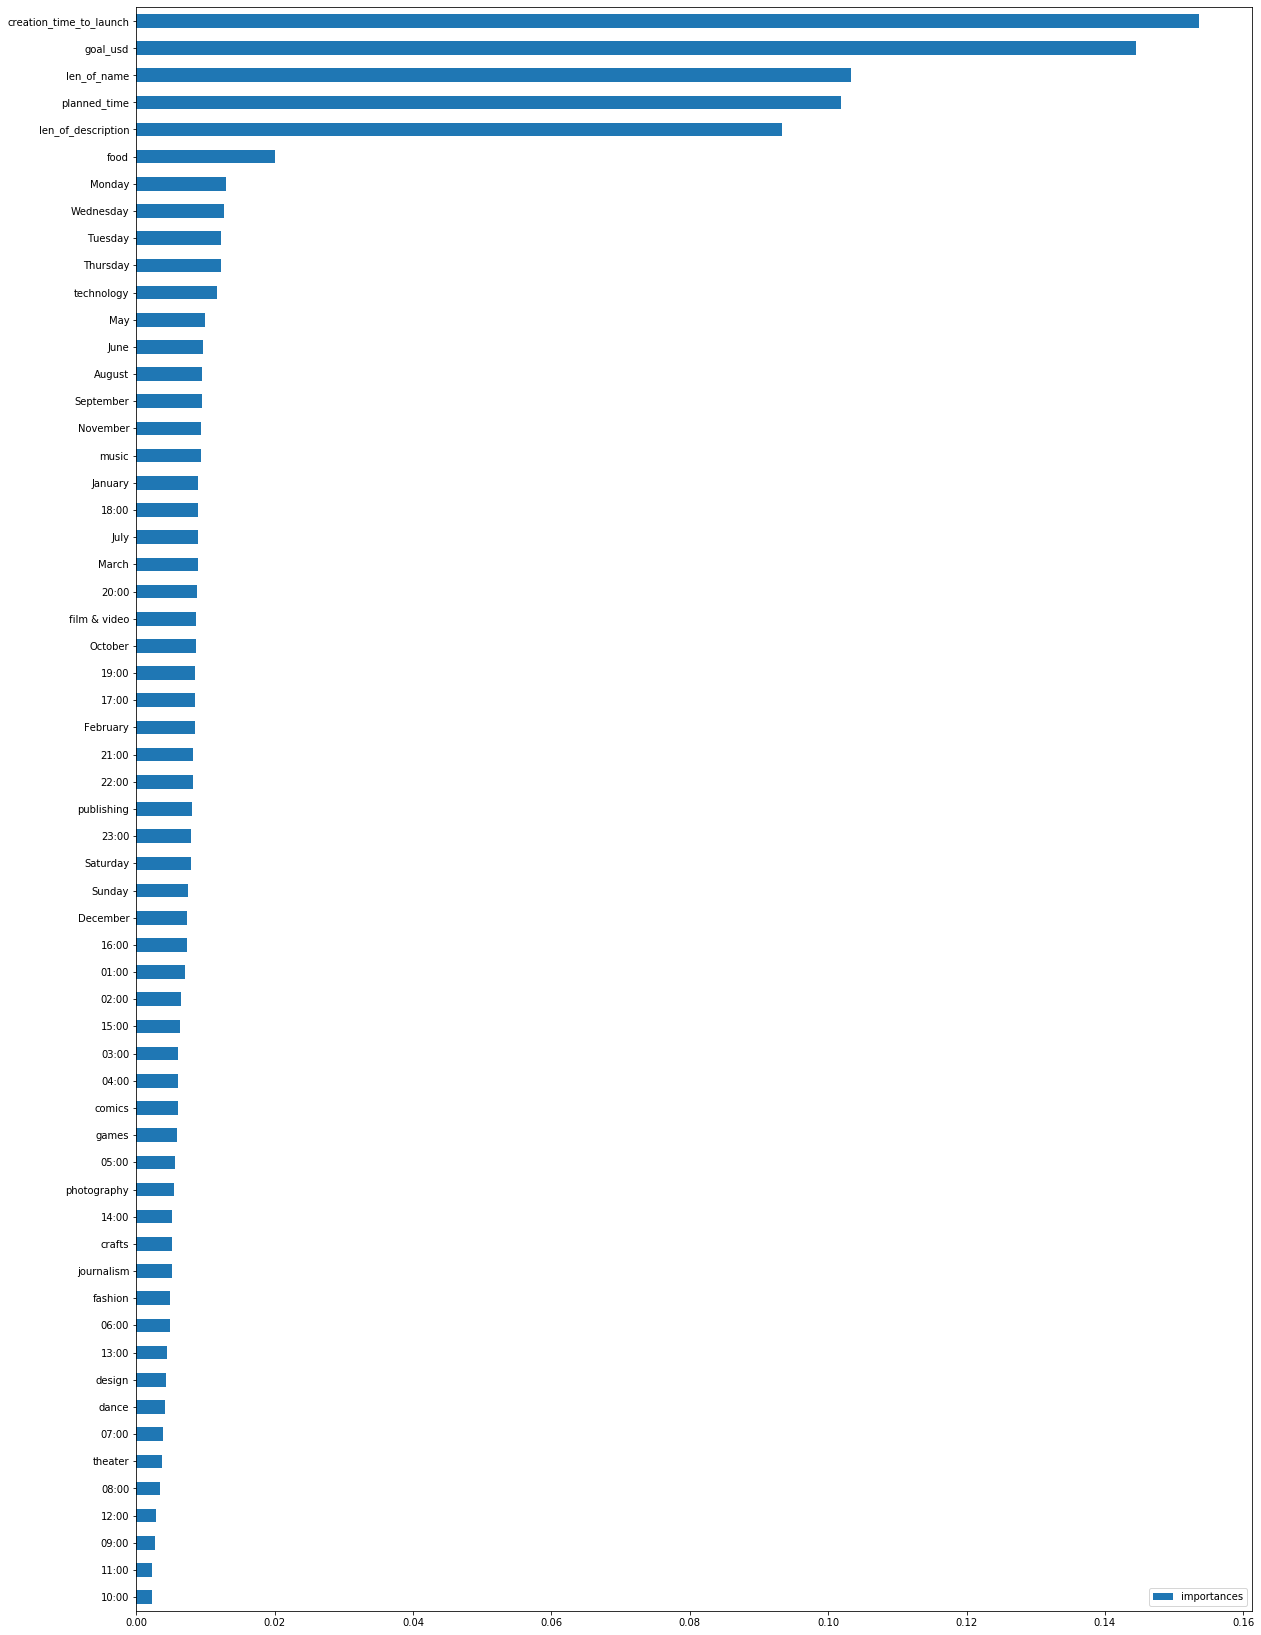

In [72]:
importances = rnc.feature_importances_
importances = pd.DataFrame(importances, index = X_train.columns, columns=['importances'])
importances.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

In [74]:
# with scaling
rnc = RandomForestClassifier(n_estimators=100,
                             max_depth = 100,
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rnc.fit(X_train_scaled, y_train)
y_pred = rnc.predict(X_test_scaled)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


Accuracy:  0.7183204362164104
              precision    recall  f1-score   support

           0       0.71      0.57      0.63     12884
           1       0.72      0.83      0.77     17743

    accuracy                           0.72     30627
   macro avg       0.72      0.70      0.70     30627
weighted avg       0.72      0.72      0.71     30627

[[ 7307  5577]
 [ 3050 14693]]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


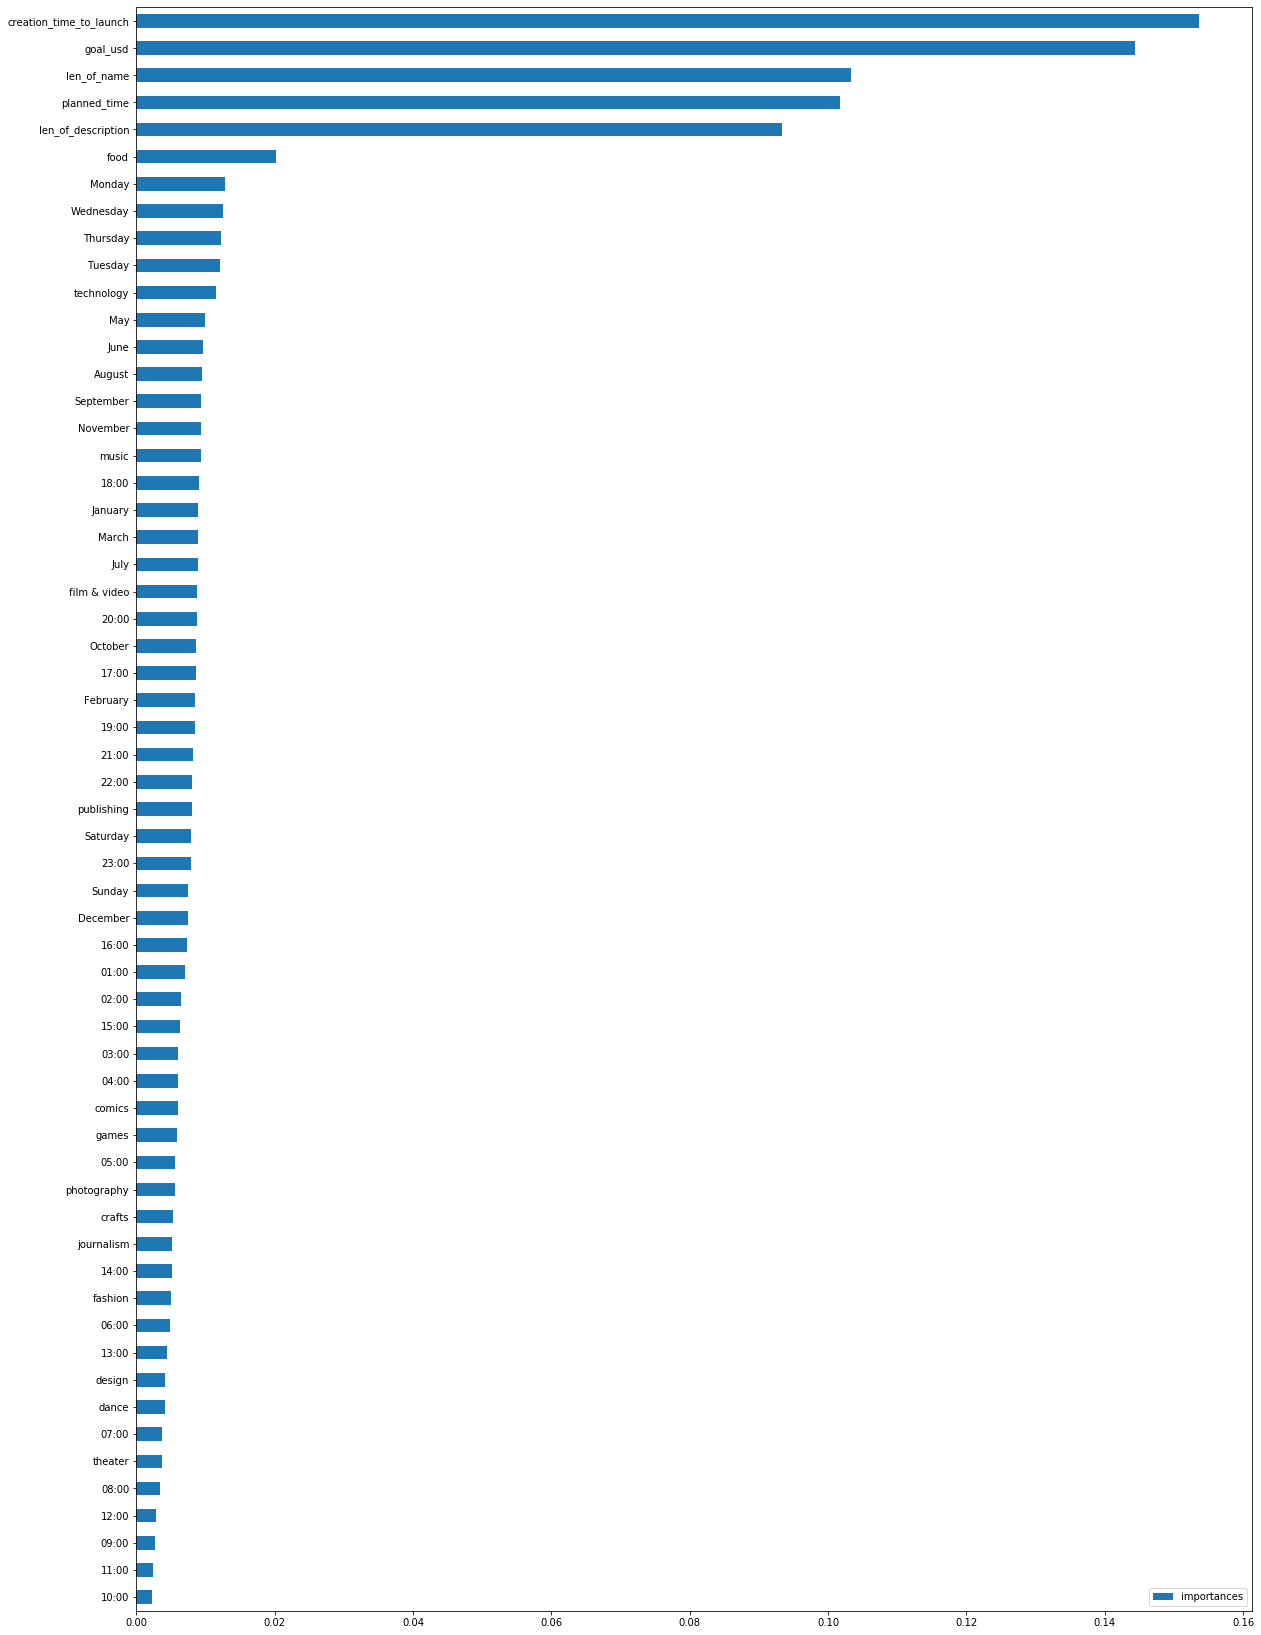

In [75]:
importances = rnc.feature_importances_
importances = pd.DataFrame(importances, index = X_train.columns, columns=['importances'])
importances.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

## Gradiend Descent Boost

In [61]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, 
                                        max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6783556992196428
              precision    recall  f1-score   support

           0       0.66      0.50      0.57     12884
           1       0.69      0.81      0.74     17743

    accuracy                           0.68     30627
   macro avg       0.67      0.65      0.65     30627
weighted avg       0.67      0.68      0.67     30627

[[ 6402  6482]
 [ 3369 14374]]


## AdaBoost

In [64]:
# without scaling
#abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Accuracy:  0.7138146080255984
              precision    recall  f1-score   support

           0       0.69      0.57      0.63     12884
           1       0.73      0.82      0.77     17743

    accuracy                           0.71     30627
   macro avg       0.71      0.69      0.70     30627
weighted avg       0.71      0.71      0.71     30627

[[ 7399  5485]
 [ 3280 14463]]


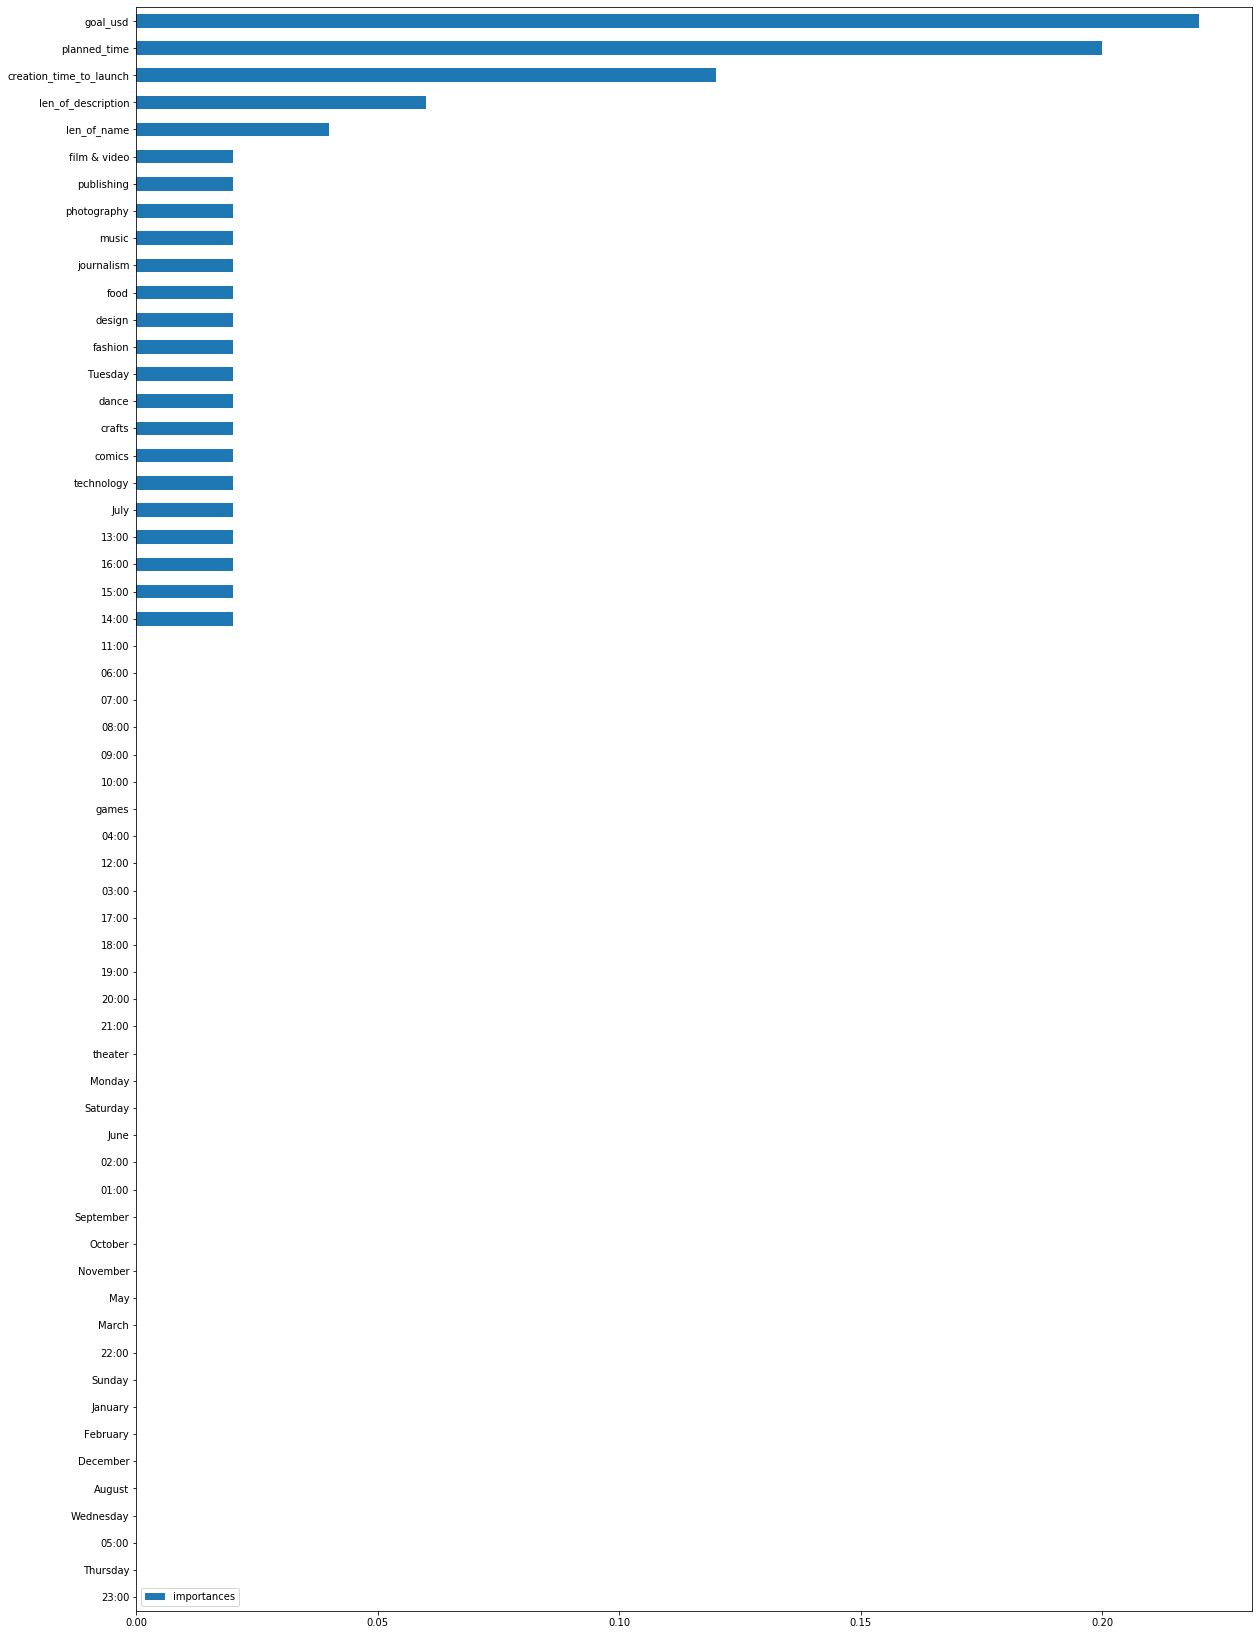

In [65]:
importances = model.feature_importances_
importances = pd.DataFrame(importances, index = X_train.columns, columns=['importances'])
importances.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

In [67]:
# with scaling
#abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Train Adaboost Classifer
model = abc.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test_scaled)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7138146080255984
              precision    recall  f1-score   support

           0       0.69      0.57      0.63     12884
           1       0.73      0.82      0.77     17743

    accuracy                           0.71     30627
   macro avg       0.71      0.69      0.70     30627
weighted avg       0.71      0.71      0.71     30627

[[ 7399  5485]
 [ 3280 14463]]


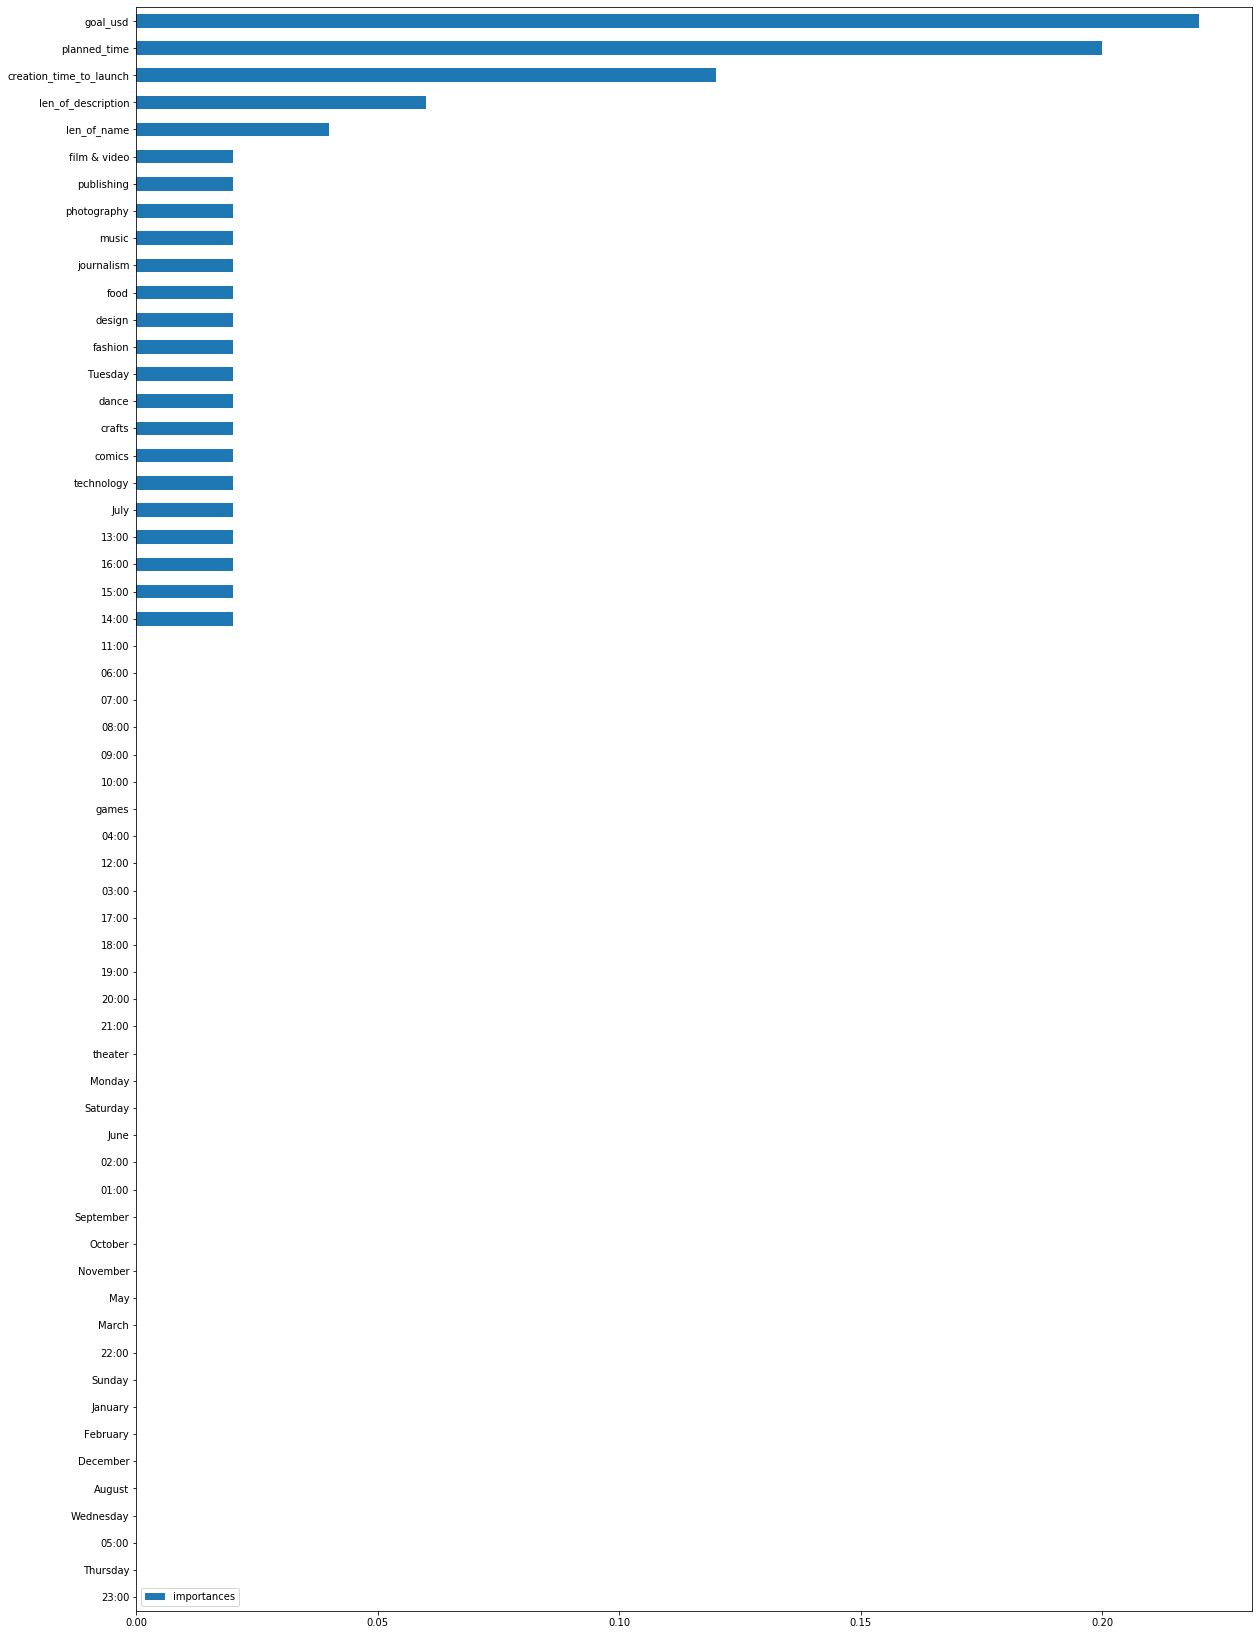

In [68]:
importances = model.feature_importances_
importances = pd.DataFrame(importances, index = X_train.columns, columns=['importances'])
importances.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

## XGBoost

In [62]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)
y_pred = xgb_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7191367094393836
Accuracy:  0.7191367094393836
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     12884
           1       0.72      0.85      0.78     17743

    accuracy                           0.72     30627
   macro avg       0.72      0.69      0.70     30627
weighted avg       0.72      0.72      0.71     30627

[[ 6908  5976]
 [ 2626 15117]]


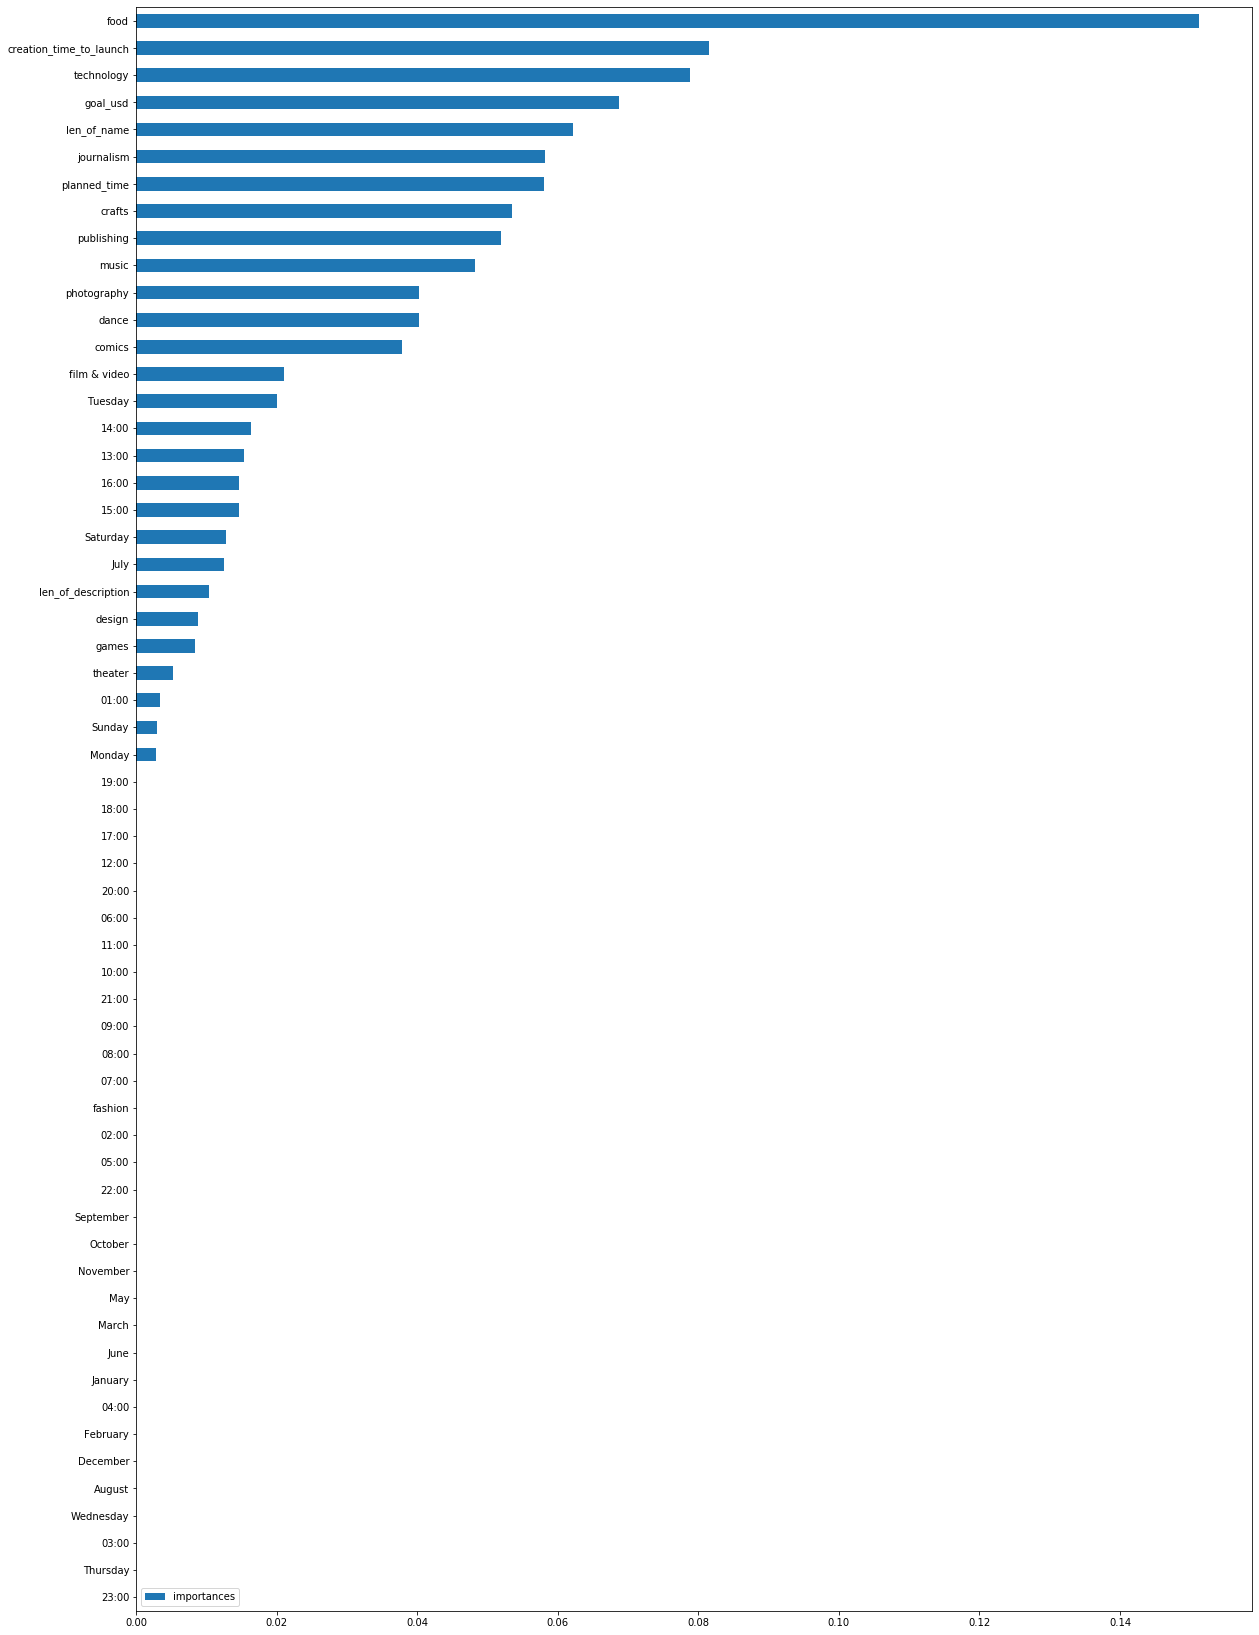

In [63]:
importances = xgb_clf.feature_importances_
importances = pd.DataFrame(importances, index = X_train.columns, columns=['importances'])
importances.sort_values(by='importances', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

# Model comparison

### without scaling

LR: 0.642774 (0.001012)
KNN: 0.644905 (0.001387)
CART: 0.626196 (0.002251)
GNB: 0.598026 (0.001349)
RFC: 0.716802 (0.003333)
GBC: 0.718949 (0.003603)
ABC: 0.713104 (0.003320)
XGB: 0.718320 (0.003436)


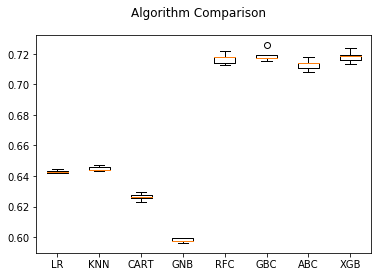

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### with scaling

LR: 0.679874 (0.003726)
CART: 0.626824 (0.001983)
GNB: 0.655386 (0.003405)
RFC: 0.717055 (0.003928)
GBC: 0.718949 (0.003634)
ABC: 0.713104 (0.003320)
XGB: 0.718320 (0.003436)


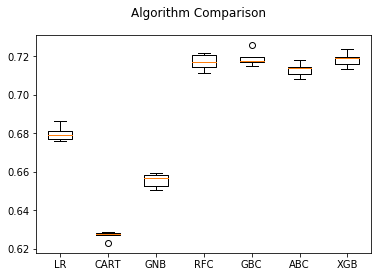

In [8]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning Hyperparameters

In [26]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### Random Forest

In [9]:
random_grid = {'max_depth': [10, 20, 50, 80, 100],
               'max_features': ['sqrt'],
               'min_samples_leaf': [1, 2, 5],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [100, 200, 300, 400]}

RFC = RandomForestClassifier()

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(RFC, param_distributions=random_grid,
                                   n_iter=n_iter_search, scoring="accuracy", n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_scaled, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 92.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 121.2min finished


RandomizedSearchCV took 7307.55 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.722 (std: 0.005)
Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80}

Model with rank: 2
Mean validation score: 0.722 (std: 0.004)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100}

Model with rank: 3
Mean validation score: 0.722 (std: 0.005)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 100}



### Adaboost

In [10]:
random_grid = {'n_estimators':[500,1000,1500],
               'learning_rate':[.001,0.01,.1, 0.5, 1]}

ADA = AdaBoostClassifier()

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(ADA, param_distributions=random_grid,
                                   n_iter=n_iter_search, scoring="accuracy", n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_scaled, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 78.3min finished


RandomizedSearchCV took 4856.42 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.718 (std: 0.005)
Parameters: {'n_estimators': 1500, 'learning_rate': 1}

Model with rank: 2
Mean validation score: 0.718 (std: 0.005)
Parameters: {'n_estimators': 500, 'learning_rate': 1}

Model with rank: 3
Mean validation score: 0.718 (std: 0.005)
Parameters: {'n_estimators': 1000, 'learning_rate': 1}



### Adaboost 2nd try (1st approach takes the edges)

In [25]:
random_grid = {'n_estimators':[500, 1000, 1500, 2000],
               'learning_rate':[0.5, 1, 1.25, 1.5]}

ADA = AdaBoostClassifier()

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(ADA, param_distributions=random_grid,
                                   n_iter=n_iter_search, scoring="accuracy", n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_scaled, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 147.9min finished


RandomizedSearchCV took 8929.30 seconds for 100 candidates parameter settings.


NameError: name 'report' is not defined

In [27]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.719 (std: 0.005)
Parameters: {'n_estimators': 500, 'learning_rate': 1.5}

Model with rank: 2
Mean validation score: 0.718 (std: 0.005)
Parameters: {'n_estimators': 1500, 'learning_rate': 1}

Model with rank: 2
Mean validation score: 0.718 (std: 0.005)
Parameters: {'n_estimators': 1500, 'learning_rate': 1}



### Gradient Boost

In [11]:
random_grid = {"n_estimators":[5,50,250,500],
               "max_depth":[1,3,5,7,9],
               "learning_rate":[0.01,0.1,1]}

GDB = GradientBoostingClassifier()

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(GDB, param_distributions=random_grid,
                                   n_iter=n_iter_search, scoring="accuracy", n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_scaled, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 212.7min finished


RandomizedSearchCV took 12852.19 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.727 (std: 0.005)
Parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: 0.727 (std: 0.005)
Parameters: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: 0.726 (std: 0.005)
Parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}



### XGBoost

In [12]:
random_grid = {"learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25],
               "max_depth":[3, 4, 5, 6, 8, 10],
               "gamma":[0.0, 0.1, 0.2 , 0.3]}

XGB = XGBClassifier()

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(XGB, param_distributions=random_grid,
                                   n_iter=n_iter_search, scoring="accuracy", n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_scaled, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 107.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 148.5min finished


RandomizedSearchCV took 8968.91 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.727 (std: 0.004)
Parameters: {'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.2}

Model with rank: 2
Mean validation score: 0.727 (std: 0.005)
Parameters: {'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.2}

Model with rank: 3
Mean validation score: 0.726 (std: 0.005)
Parameters: {'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.3}



# Stacking

combine all models and run an additional model to estimate the predictions of the 4 best models with optimal parameters dervied by Random Search

* CREATE A LIST WITH THE MODELS and the optimal paramters:

In [ ]:
{'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1}

In [28]:
models = [
    RandomForestClassifier(random_state=41, n_jobs=-1, 
                           n_estimators=200, max_depth=80, min_samples_split=10, 
                           min_samples_leaf=2,
                           max_features='sqrt'),
        
    AdaBoostClassifier(random_state=41,learning_rate=1.5, n_estimators=500),
    
    GradientBoostingClassifier(random_state=41, 
                               n_estimators=250, max_depth=5, learning_rate=0.1),
    
    XGBClassifier(random_state=41,
                  max_depth=6, learning_rate= 0.15, gamma=0.2)
                 ]

Making predictions with the first level models:

In [29]:
S_train, S_test = stacking(models,                   
                           X_train_scaled, y_train, X_test_scaled,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [RandomForestClassifier]
    fold  0:  [0.72103957]
    fold  1:  [0.71924249]
    fold  2:  [0.72128864]
    fold  3:  [0.71845886]
    ----
    MEAN:     [0.72000739] + [0.00119269]
    FULL:     [0.72000740]

model  1:     [AdaBoostClassifier]
    fold  0:  [0.71955944]
    fold  1:  [0.71641271]
    fold  2:  [0.71819765]
    fold  3:  [0.71676099]
    ----
    MEAN:     [0.71773270] + [0.00124898]
    FULL:     [0.71773272]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.72608942]
    fold  1:  [0.72398781]
    fold  2:  [0.72581628]
    fold  3:  [0.72224641]
    ----
    MEAN:     [0.72453498] + [0.00154879]
    FULL:     [0.72453500]

model  3:     [XGBClassifier]
    fold  0:  [0.72378216]
    fold  1:  [0.72359599]
    fold  2:  [0.72651284]
    fold  3:  [0.72176752]
    ----
    MEAN:     [0.72391463] + [0.00169410]
    F

Contruct the final model ('Blender') over the predictions of the 1st level models:

In [30]:
model = XGBClassifier(random_state=41, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.72805041]


### Hyperparameter tuning Blender Model (XGBoost):

In [33]:
random_grid = {"learning_rate":[0.10, 0.15, 0.20],
               "max_depth":[6, 8, 10],
               "gamma":[ 0.1, 0.2 , 0.3],
               "n_estimators":[100,150,200]}

XGB = XGBClassifier()

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(XGB, param_distributions=random_grid,
                                   n_iter=n_iter_search, scoring="accuracy", n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_scaled, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 91.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 236.4min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 263.6min finished


RandomizedSearchCV took 15929.65 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.727 (std: 0.005)
Parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3}

Model with rank: 2
Mean validation score: 0.727 (std: 0.005)
Parameters: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.3}

Model with rank: 3
Mean validation score: 0.727 (std: 0.004)
Parameters: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.2}



In [34]:
model = XGBClassifier(random_state=41, n_jobs=-1, learning_rate=0.15, 
                      n_estimators=200, max_depth=6, gamma=0.3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.72743005]


* Model with hyperparameter tuning slightly worse than original Blender-Model
* **Thus, our best prediction is 0.728**

### Key Takeaways and future work: